#### In this notebook, I try to explore the lego history dataset provided by DataCamp and try to answer two questions
#### Question #1: What is the percentage of lincensed sets which were Star Wars?
#### Question #2: In which year was Star Wars not the most popular licensed theme ()in terms of number of sets released that year?
#### Additionally, I will try figuring out how many licensed sets were released in each year

##### check out the DataCamp project in that link https://app.datacamp.com/learn/projects/history-of-lego/guided/Python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load datasets into dataframes
lego_sets_df = pd.read_csv('sets.csv')
parent_themes_df = pd.read_csv('themes.csv')

In [4]:
lego_sets_df.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [5]:
parent_themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


## Question #1: What is the percentage of lincensed sets which were Star Wars?

In [7]:
# try to merge two datasets into one
merged = pd.merge(lego_sets_df, parent_themes_df, how = 'inner', left_on = 'parent_theme', right_on = 'name')
merged.drop(columns = 'name_y', inplace = True)
merged.head()

KeyError: ignored

In [8]:
# seems like the prev answer we got in the prev version (45%) is wrong.
# we need to clean data
# as it mentioned there in the doc, set_num could be null which means it could be invalid or duplicated sets
# So we need to remove those null values

merged_cleaned = merged.dropna(subset = ['set_num'])

NameError: ignored

In [9]:
# Get just those themes were licensed
licensed_themes = merged_cleaned[merged_cleaned["is_licensed"]]
licensed_themes.head()

NameError: ignored

In [10]:
# Calculate the percentage of Star Wars
all_licensed_count = licensed_themes.shape[0]
star_war_legos = licensed_themes[licensed_themes["parent_theme"] == 'Star Wars']
licensed_star_wars_count = star_war_legos.shape[0]

licensed_star_wars_percentage = int(licensed_star_wars_count/all_licensed_count * 100)
licensed_star_wars_percentage


NameError: ignored

In [ ]:
# Seems like the answer this time (51%) is correct

#### What is the percentage of licensed sets which were Star Wars? 51%

## Question #2: In which year was Star Wars not the most popular licensed theme ()in terms of number of sets released that year?

In [11]:
# let's add "count" columns = 1 to all rows, then we can sum depends on that columns
licensed_themes['count'] = 1
group_by_years = licensed_themes.groupby(['year','parent_theme']).sum()
group_by_years.head()

NameError: ignored

In [12]:
# now we need to get the max count for each year
# lets get the max for each year by sorting by the count in descding order
max_sets = group_by_years.sort_values('count', ascending = False)
max_sets.head()

NameError: ignored

In [ ]:
# above we can see 1st and 4th rows, both are in 2017 but we need the fisrt as it's the max (most popular)
# simply we can drop duplicates and keep the first value only which is the default behavior of drop_duolicates() method
max_sets = max_sets.reset_index()
max_sets_no_dublicates = max_sets.drop_duplicates(subset = 'year')
max_sets_no_dublicates.head(10)
max_sets_no_dublicates.sort_values('year')

max_sets_no_dublicates.head()

,year,parent_theme,num_parts,id,is_licensed,count
0,2017,Super Heroes,13123.0,34704,72,72
1,2016,Star Wars,6934.0,9638,61,61
2,2015,Star Wars,11410.0,9164,58,58
4,2014,Star Wars,8293.0,7110,45,45
5,2012,Star Wars,6769.0,6794,43,43


In [ ]:
years_war_star_not_popular = max_sets_no_dublicates[max_sets_no_dublicates["parent_theme"] != "Star Wars"]['year']
years_war_star_not_popular

0    2017
Name: year, dtype: int64

In [ ]:
# Answer is 2017

In [ ]:
# Try to show number of sets per year
by_year = licensed_themes.groupby("year").sum().reset_index()
by_year.head()

,year,num_parts,id,is_licensed,count
0,1999,1384.0,2054,13,13
1,2000,2985.0,6048,31,31
2,2001,4233.0,4918,25,25
3,2002,6465.0,10544,50,50
4,2003,7069.0,8204,40,40


<Figure size 864x576 with 0 Axes>

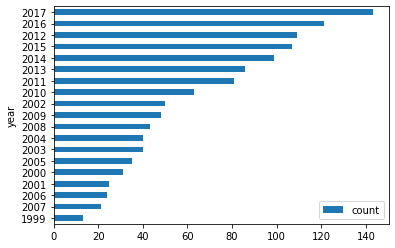

In [ ]:
plt.figure(figsize=(12,8))
by_year.sort_values('count',inplace=True)
by_year.plot(kind='barh',y='count',x='year')
plt.show()
